In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

In [ ]:
from zipfile import ZipFile
file = "/content/drive/MyDrive/Nucleus.zip"

with ZipFile(file,'r') as zips:
  zips.extractall()
  print('Done')

Done


In [ ]:
%tensorflow_version 1.x


TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [ ]:
pip install 'h5py==2.10.0' --force-reinstall

  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
tensorflow 1.15.2 requires gast==0.2.2, but you have gast 0.5.3 which is incompatible.
lucid 0.3.10 requir

In [ ]:
files.upload()

Saving data_augmentation.py to data_augmentation (2).py


{'data_augmentation.py': b'# -*- coding: utf-8 -*-\n"""\nCreated on Tue Feb  4 18:10:48 2020\n\n@author: KiranKharel\n"""\nfrom keras.preprocessing.image import ImageDataGenerator\nseed = 1\n\ndef perform_augmentation(x_check, y_check, split_size, BATCH_SIZE):\n    \n    #creating the training image and its respective mask\n    data_gen_args = dict(\n            shear_range=0.5,\n            rotation_range=40,\n            zoom_range=0.2,\n            width_shift_range=0.2,\n            height_shift_range=0.2,\n            fill_mode=\'reflect\'#nearest\n            )\n    \n    #creating training image and mask generator\n    image_datagen = ImageDataGenerator(**data_gen_args)\n    mask_datagen = ImageDataGenerator(**data_gen_args)\n    \n    #creating the validation Image and Mask generator\n    image_datagen_val = ImageDataGenerator()\n    mask_datagen_val = ImageDataGenerator()\n    \n    # Provide the same seed and keyword arguments to the fit and flow methods\n    image_datagen.fi

In [ ]:
files.upload()

Saving data_generation.py to data_generation (2).py


{'data_generation.py': b'# -*- coding: utf-8 -*-\n"""\nCreated on Tue Feb  4 17:52:14 2020\n\n@author: KiranKharel\n"""\n#importing libraries\nimport os\nimport sys\nimport numpy as np\nimport warnings\nimport cv2\nfrom tqdm import tqdm\nwarnings.filterwarnings(\'ignore\')\n#seeding\nseed = 42\n\nclass DataGen:\n    def __init__(self, ids, datasettype, path, image_size = 128, img_channels = 3):\n        self.ids = ids\n        self.path = path\n        self.image_size = image_size\n        self.datasettype = datasettype\n        self.img_channels = img_channels\n        \n    def __load__(self, id_name):\n        ##path \n        image_path = os.path.join(self.path, id_name, "images",id_name)+".png"\n        mask_path = os.path.join(self.path, id_name, "masks/")\n\n        #reading image\n        image = cv2.imread(image_path,1)\n        image = cv2.resize(image, (self.image_size, self.image_size))\n        \n        #reading mask\n        mask = np.zeros((self.image_size, self.image_s

In [ ]:
files.upload()

Saving UNet_Model.py to UNet_Model (2).py


{'UNet_Model.py': b'# -*- coding: utf-8 -*-\n"""\nCreated on Tue Feb  4 18:27:15 2020\n\n@author: KiranKharel\n"""\nfrom keras.models import Model\nfrom keras.layers import Input, UpSampling2D\nfrom keras.layers.core import Dropout, Lambda\nfrom keras.layers.convolutional import Conv2D\nfrom keras.layers.pooling import MaxPooling2D\nfrom keras.layers import Concatenate\nfrom utils import mean_iou\n\nclass UNet:\n    def __init__(self, image_size = 128, img_channels = 3, kernel_size = (3,3), padding = \'same\', strides = 1, kernel_initializer = \'he_normal\', activation = \'relu\'):\n        self.image_size = image_size\n        self.img_channels = img_channels\n        self.kernel_size = kernel_size\n        self.padding = padding\n        self.strides = strides\n        self.kernel_initializer = kernel_initializer\n        self.activation = activation\n\n    def down_block(self, x, filters):\n        c = Conv2D(filters,\n                self.kernel_size, \n                padding=self

In [ ]:
files.upload()

Saving utils.py to utils (2).py


{'utils.py': b'# -*- coding: utf-8 -*-\n"""\nCreated on Tue Feb  4 18:32:45 2020\n\n@author: Khare\n"""\nimport numpy as np\nimport tensorflow as tf\nfrom keras import backend as K\n#evaluation metric\n#Intersection over UNion (IOU) metric:\ndef mean_iou(y_true, y_pred):\n    prec = []\n    for t in np.arange(0.5, 1.0, 0.05):\n        y_pred_ = tf.to_int32(y_pred > t)\n        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)\n        K.get_session().run(tf.local_variables_initializer())\n        with tf.control_dependencies([up_opt]):\n            score = tf.identity(score)\n        prec.append(score)\n    return K.mean(K.stack(prec), axis=0)'}

In [ ]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from data_generation import *
from data_augmentation import perform_augmentation
from utils import mean_iou
import warnings
from keras import backend as K
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [ ]:
IMAGE_SIZE = 128
BATCH_SIZE = 16
IMG_CHANNELS = 3
EPOCHS = 5
TRAIN_PATH = '/content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/stage1_train/'
TEST_PATH = '/content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/stage1_test/'

#Training AND testing Ids
train_ids = next (os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

print(len(train_ids), len(test_ids))

670 65


Firstly, We read the training images and their respective mask using the class DataGen

In [ ]:
gen = DataGen(train_ids, "train", TRAIN_PATH, image_size=IMAGE_SIZE)
X_train, Y_train = gen.__getitems__()

Getting and Resizing train images and masks.....


100%|██████████| 670/670 [00:30<00:00, 21.70it/s]


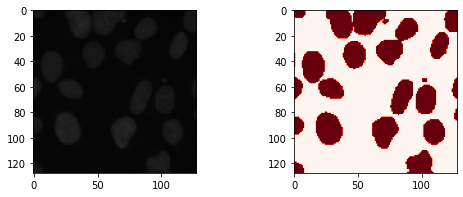

In [ ]:
#plotting the corresponding nucleus and its respective mask
index = random.randint(0, len(X_train)-1)

fig, ax = plt.subplots(1, 2, figsize = (8,3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
ax[0].imshow(X_train[index])
#plt.imshow(np.reshape(y_check[index], (IMAGE_SIZE, IMAGE_SIZE)),cmap='gray')
plt.imshow(np.squeeze(Y_train)[index], cmap='Reds')
plt.show()

Performing data augmentation for creating more image samples for training purpose

In [ ]:
#data augmentation using predefined class
x, y, x_val, y_val = perform_augmentation(X_train, Y_train, split_size=0.9, BATCH_SIZE=BATCH_SIZE)

In [ ]:
#combine generators into one which yields image and masks
train_generator = zip(x, y)
val_generator = zip(x_val, y_val)

In [ ]:
len(x), len(y), len(x_val), len(y_val)

(38, 38, 5, 5)

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

In [ ]:
def jaccard_index(y_true, y_pred, smooth=100):
    """ Calculates mean of Jaccard distance as a loss function """
    intersection = tf.reduce_sum(y_true * y_pred, axis=(1,2))
    sum_ = tf.reduce_sum(y_true + y_pred, axis=(1,2))
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    jd =  (1 - jac) * smooth
    return tf.reduce_mean(jd)

In [ ]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [ ]:
import keras
image_size=128
def UNet():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((image_size, image_size, 3))
    
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) #128 -> 64
    c2, p2 = down_block(p1, f[1]) #64 -> 32
    c3, p3 = down_block(p2, f[2]) #32 -> 16
    c4, p4 = down_block(p3, f[3]) #16->8
    
    bn = bottleneck(p4, f[4])
    
    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

In [ ]:
model = UNet()

from keras import backend as K
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[jaccard_index,dice_coef,'accuracy'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 128, 128, 16) 448         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 128, 128, 16) 2320        conv2d_39[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 64, 64, 16)   0           conv2d_40[0][0]                  
____________________________________________________________________________________________

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 16  2320        ['conv2d[0][0]']                 
                                )                                                             

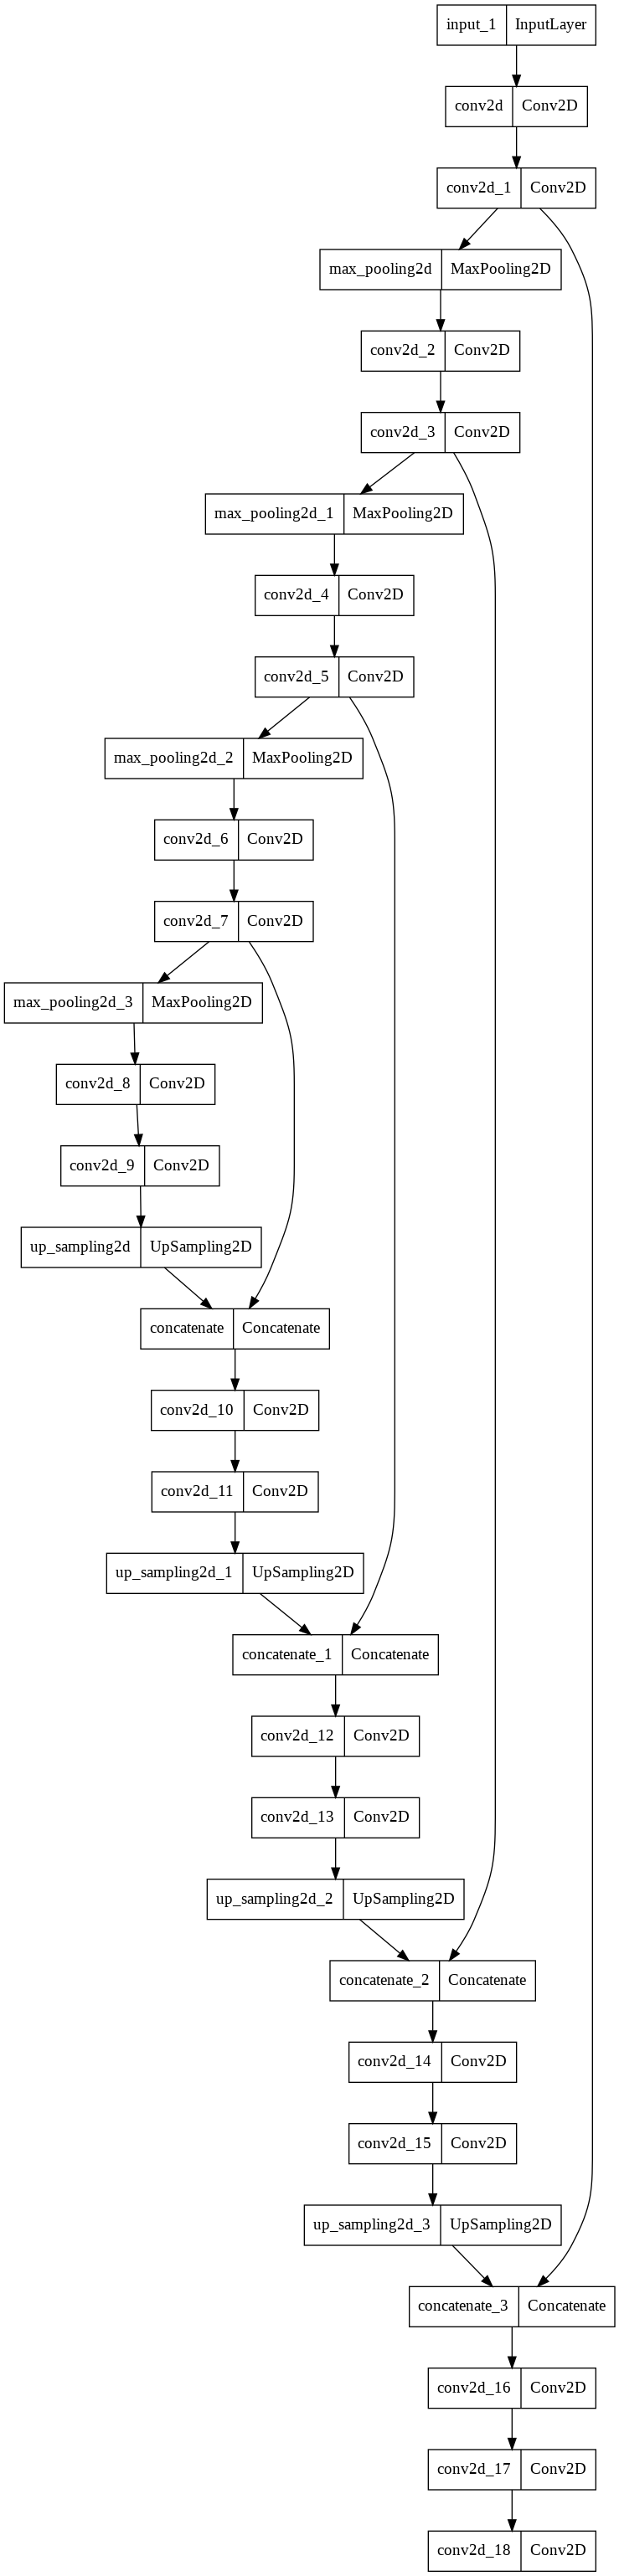

In [ ]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model,to_file='Final_Thesis_Model.png')

In [ ]:
#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/model_No_EarlyStoper_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [  tf.keras.callbacks.TensorBoard(log_dir='logs')]
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=30, callbacks=callbacks)

Train on 603 samples, validate on 67 samples
Epoch 1/30
603/603 [==============================] - 89s 148ms/step - loss: 0.0705 - jaccard_index: 22.7359 - dice_coef: 0.8650 - accuracy: 0.9728 - val_loss: 0.0607 - val_jaccard_index: 20.0331 - val_dice_coef: 0.8795 - val_accuracy: 0.9765
Epoch 2/30
603/603 [==============================] - 88s 146ms/step - loss: 0.0701 - jaccard_index: 22.0492 - dice_coef: 0.8680 - accuracy: 0.9728 - val_loss: 0.0604 - val_jaccard_index: 19.8253 - val_dice_coef: 0.8810 - val_accuracy: 0.9767
Epoch 3/30
603/603 [==============================] - 88s 145ms/step - loss: 0.0690 - jaccard_index: 21.6497 - dice_coef: 0.8697 - accuracy: 0.9730 - val_loss: 0.0563 - val_jaccard_index: 18.3190 - val_dice_coef: 0.8954 - val_accuracy: 0.9781
Epoch 4/30
603/603 [==============================] - 88s 147ms/step - loss: 0.0693 - jaccard_index: 21.7240 - dice_coef: 0.8679 - accuracy: 0.9731 - val_loss: 0.0558 - val_jaccard_index: 18.8306 - val_dice_coef: 0.8913 - val_

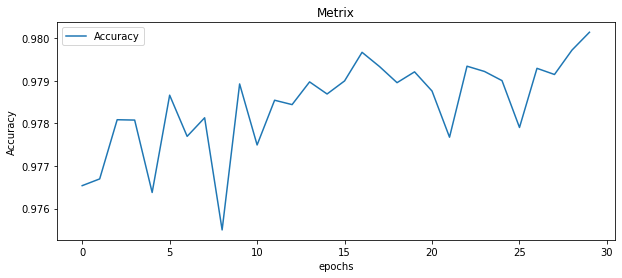

In [ ]:
#plotting the Accuracy curve
plt.figure(figsize=(10,4))
plt.plot(results.history['val_accuracy'], label='Accuracy')
plt.xlabel("Epochs")
plt.title('Metrix')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.show();

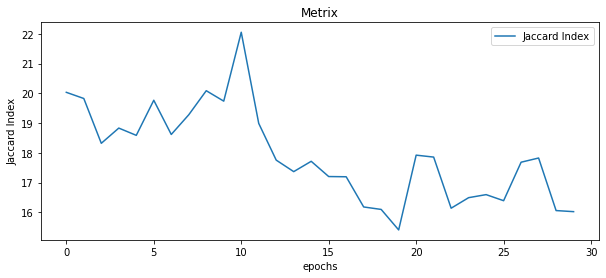

In [ ]:
#plotting the Jaccard curve
plt.figure(figsize=(10,4))
plt.plot(results.history['val_jaccard_index'], label='Jaccard Index')
plt.xlabel("Epochs")
plt.title('Metrix')
plt.ylabel('Jaccard Index')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

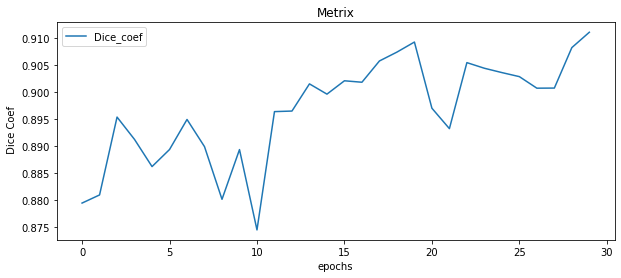

In [ ]:
#plotting the Dice curve
plt.figure(figsize=(10,4))
plt.plot(results.history['val_dice_coef'], label='Dice_coef')
#plt.plot(results.history['val_accuracy'], label='Accuracy')
plt.xlabel("Epochs")
plt.title('Metrix')
plt.ylabel(' Dice Coef')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.show();

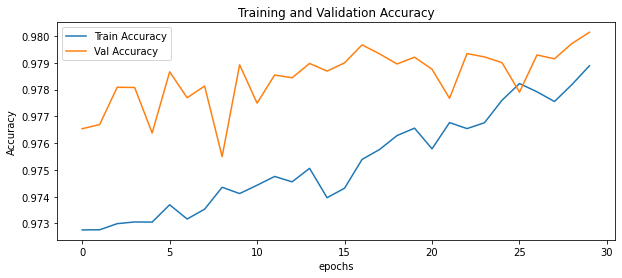

In [ ]:
#plotting the learning curve
plt.figure(figsize=(10,4))
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Val Accuracy')
#plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.show();

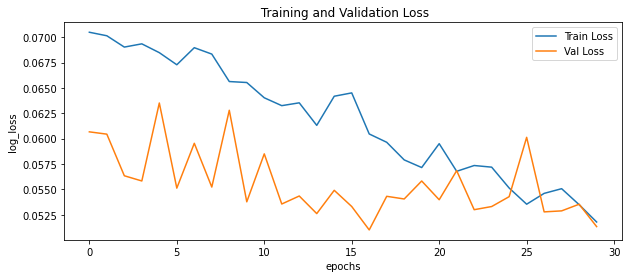

In [ ]:
#plotting the learning curve
plt.figure(figsize=(10,4))
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Val Loss')
#plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.title(' Training and Validation Accuracy & Loss')
plt.ylabel('log_loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
from keras.models import load_model
model1 = load_model('/content/drive/MyDrive/Best_model-dsbowl2018-2.h5', custom_objects={'mean_iou':mean_iou})
preds_train1 = model1.predict(X_train[:int(X_train.shape[0]*0.9)], verbose = 1)
preds_val1 = model1.predict(X_train[int(X_train.shape[0]*0.9):], verbose = 1)

#Threshold predictions
preds_train_thres1 = (preds_train1 > 0.5).astype(np.uint8)
preds_val_thres1 = (preds_val1 > 0.5).astype(np.uint8)

67/67 [==============================] - 3s 51ms/step


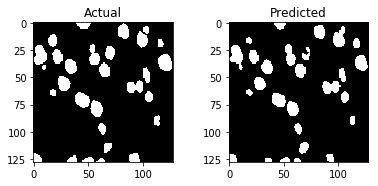

In [ ]:
#performing ceck on some random sample
ix = random.randint(0, len(preds_train_thres1))

fig, ax = plt.subplots(1, 2, figsize=(6,4))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
ax[0].imshow(np.squeeze(Y_train[ix]), cmap ='gray')
ax[1].imshow(np.squeeze(preds_train_thres1[ix]), cmap = 'gray')
ax[0].title.set_text('Actual')
ax[1].title.set_text('Predicted')

plt.show()